# Final Project

# Analysis on Powerplant Data

### Data Source: https://datasets.wri.org/dataset/globalpowerplantdatabase

#### Description:
The Global Power Plant Database is an open-source database of power plants from all over the world. It gathers data from power plants in one place, making it easy to navigate, compare, and draw conclusions for one's own analysis. The database comprises roughly 35,000 thermal (coal, gas, oil, nuclear, biomass, waste, geothermal) and renewable power plants from 167 nations (e.g. hydro, wind, solar). Each power plant is geolocated, with information about its capacity, generation, ownership, and fuel type included in the entries.

Objective of this project to identify which countries have most power plants and out of them which are high generating powerplants.

In [1]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# creating dataframes for both csv files
df_power_plant_db = pd.read_csv('https://raw.githubusercontent.com/suresh1308/Files/main/global_power_plant_database.csv')
df_power_plant_db_estimated = pd.read_csv('https://raw.githubusercontent.com/suresh1308/Files/main/global_power_plant_database_estimated.csv')

#### Exploring datasets

In [3]:
# checking the data for first dataset
df_power_plant_db.head(2)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.119,Hydro,NaN,NaN,...,1009793,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.795,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# checking the data for second dataset
df_power_plant_db_estimated.head(2)

,gppd_idnr,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,GEODB0040538,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,WKS0070144,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE


In [5]:
# merging both data sets on 'gppd_idnr' column
df=pd.merge(df_power_plant_db,df_power_plant_db_estimated,on='gppd_idnr')
df.head(2)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.119,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.795,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE


In [6]:
# describing the dataset
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
count,34936.000000,34936.000000,34936.000000,17447.000000,14887.000000,6417.000000,7226.000000,8203.000000,9144.000000,9500.000000,9637.000000,9659.000000,16120.000000,16503.000000,17050.000000,17570.000000,33138.000000
mean,163.355148,32.816637,-6.972803,1997.414823,2018.218849,592.696107,656.863891,762.368840,693.149763,661.834161,517.320785,423.922436,239.112221,242.431122,235.866067,235.695265,716.443378
std,489.636072,22.638603,78.405850,23.397835,1.606428,2174.833482,2231.464288,2533.459828,2404.516759,2369.296957,1975.302686,1698.506485,1191.258172,1285.798297,1267.005223,1259.559841,2484.361200
min,1.000000,-77.847000,-179.977700,1896.000000,2000.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,-780.339000,1.120000,0.870000,0.440000,0.300000,0.000000
25%,4.900000,29.256475,-77.641550,1988.000000,2017.000000,1.947000,2.260000,2.664500,2.729000,2.467000,2.242000,2.751500,8.620000,8.680000,8.380000,8.322500,8.180000
50%,16.745000,39.727750,-2.127100,2007.000000,2019.000000,23.426000,23.608500,26.142000,22.462389,17.876500,12.530000,11.530000,27.620000,28.250000,26.830000,27.555000,37.590000
75%,75.344250,46.263125,49.502675,2014.000000,2019.000000,199.706000,226.322250,285.862583,249.866750,214.505150,151.117000,122.781498,106.805000,106.980000,103.120000,107.237500,229.565000
max,22500.000000,71.292000,179.388700,2020.000000,2019.000000,50834.000000,32320.917000,37433.607000,32377.477000,36448.643000,35136.000000,31920.368000,48675.060000,58470.770000,57113.350000,60859.730000,82810.770000


In [7]:
# checking number of rows and columns in dataframe
df.shape

(34936, 36)

The combined dataset has 34936 rows and 36 columns. Observed inconsistencies are mentioned below.

#### Data Inconsistencies:
- power generation data is missing for most of the countries.
- Estimation data is missing for lot of years which will lead to huge complications
- missing data for 'commisioning_year','year of capacity' columns

#### Cleaning Data
- converted object data types to strings

In [8]:
# converting column data types
df=df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  string 
 1   country_long                    34936 non-null  string 
 2   name                            34936 non-null  string 
 3   gppd_idnr                       34936 non-null  string 
 4   capacity_mw                     34936 non-null  Float64
 5   latitude                        34936 non-null  Float64
 6   longitude                       34936 non-null  Float64
 7   primary_fuel                    34936 non-null  string 
 8   other_fuel1                     1944 non-null   string 
 9   other_fuel2                     276 non-null    string 
 10  other_fuel3                     92 non-null     string 
 11  commissioning_year              17447 non-null  Float64
 12  owner                           

In [9]:
# Updating dataframe by replacing null values of generation data(all years) with 0
df.update(df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']].fillna(0))
# Updating dataframe by replacing null values of estimated data(all years) with 0
df.update(df[['estimated_generation_gwh_2013','estimated_generation_gwh_2014','estimated_generation_gwh_2015','estimated_generation_gwh_2016','estimated_generation_gwh_2017']].fillna(0))
# Updating null values of all other fuels columns with 'No_Fuel'
df.update(df[['other_fuel1','other_fuel2','other_fuel3']].fillna('No_Fuel'))

In [10]:
# dropping off generation note columns as we don't have any operations to perform on these
df = df.drop(['estimated_generation_note_2013','estimated_generation_note_2014','estimated_generation_note_2015','estimated_generation_note_2016','estimated_generation_note_2017'], axis=1)
# dropping off generation_gwh of 2018 and 2019 columns as we don't have estimates for the same years
df=df.drop(['generation_gwh_2018','generation_gwh_2019'],axis=1)
# dropping 'commissioning_year','owner','source','url','geolocation_source','wepp_id','year_of_capacity_data' and 'generation_data_source' columns as most of them have missing data
df = df.drop(['commissioning_year','owner','source','url','geolocation_source','wepp_id','year_of_capacity_data','generation_data_source'],axis=1)
df.shape

(34936, 21)

__Note :__ after dropping the several columns which are not being used for analysis, the size of new data frame is 34,936 rows and 21 columns

#### Sanity check to identify duplicates

In [11]:
# checking value counts of primary fuel
df['primary_fuel'].value_counts()

Solar             10665
Hydro              7156
Wind               5344
Gas                3998
Coal               2330
Oil                2320
Biomass            1430
Waste              1068
Nuclear             195
Geothermal          189
Storage             135
Other                43
Cogeneration         41
Petcoke              12
Wave and Tidal       10
Name: primary_fuel, dtype: Int64

In [12]:
# checking value counts of powerplant id
df['gppd_idnr'].value_counts()

WRI1018722    1
WRI1006377    1
USA0058974    1
WRI1061379    1
USA0057900    1
             ..
WRI1022610    1
BRA0029456    1
WRI1023862    1
USA0059896    1
USA0061532    1
Name: gppd_idnr, Length: 34936, dtype: Int64

__Note :__ observed that 'id' count matches with number of rows present in df hence each row is distinct

In [13]:
# Calculating total estimates for five years and added it to 'total_estimate' column
df['total_estimate'] = df['estimated_generation_gwh_2013'] + df['estimated_generation_gwh_2014'] + df['estimated_generation_gwh_2015'] + df['estimated_generation_gwh_2016'] + df['estimated_generation_gwh_2017']
# Calculating total generation for five years and added it to 'total_generation' column
df['total_generation'] = df['generation_gwh_2013'] + df['generation_gwh_2014'] + df['generation_gwh_2015'] + df['generation_gwh_2016'] + df['generation_gwh_2017']

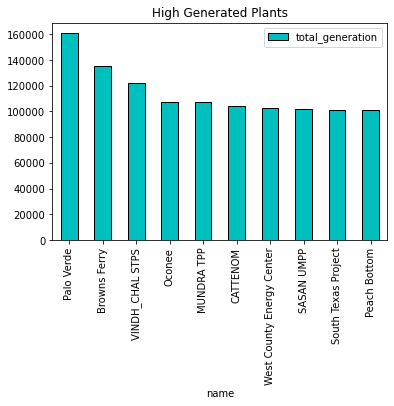

In [14]:
# Identifying the top 10 generated powerplants for five years span(2013-2017)
df.sort_values(by='total_generation',ascending=False).head(10).plot(x='name',y='total_generation',kind='bar',color='c',edgecolor='k')
plt.title('High Generated Plants')
plt.show()

In [15]:
# Created a function to get number of powerplants in a country
# Created another function to plot the name of powerplant and it's capacity
class powerplantdata:
    def __init__(self, df):
        self.df = df
    def powerplants_data(self,column_name):
        self.column_name = column_name
        df_g = df[df['country'] == column_name]['name']
        return len(df_g.to_list())
    def plot(self,column_name):
        self.column_name = column_name
        df_a = df[df['country'] == column_name]
        return df_a.plot(x='name',y='capacity_mw',kind='bar',color='blueviolet',edgecolor='k',figsize=(8,6))

In [16]:
# generating number of powerplants in a specific country with 'powerplants_data' function by passing dataframe
p = powerplantdata(df)
p.powerplants_data('AFG')

9

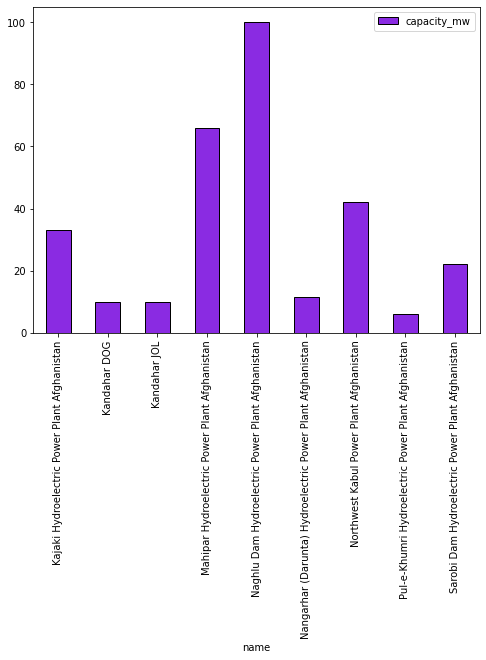

In [17]:
# plotting data with plot function
p.plot('AFG')

In [18]:
# Identifying top 10 countries with high number of power plants 
top10_list = df.groupby('country').agg({'name':'count'}).sort_values(by='name',ascending=False).head(10).index.to_list()
top10_list

['USA', 'CHN', 'GBR', 'BRA', 'FRA', 'IND', 'DEU', 'CAN', 'ESP', 'RUS']

In [19]:
# created filter using above list and extracted new dataframe for top10 countries
filter = df.country.isin(top10_list)
df_top10 = df[filter]

In [20]:
# finding out highest used primary fuel for generation in top10 countries
grouped_df = df_top10.groupby(['primary_fuel']).agg({'name':'count'}).sort_values(by='name')
grouped_df

,name
primary_fuel,
Wave and Tidal,9
Petcoke,11
Other,32
Cogeneration,41
Geothermal,71
Storage,135
Nuclear,136
Waste,963
Biomass,1189


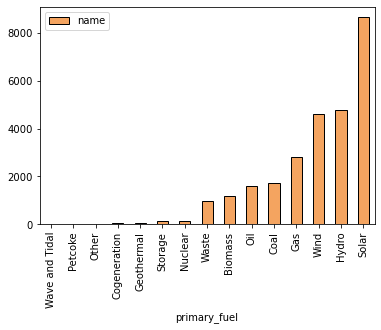

In [21]:
# visual representation of above block
grouped_df.plot(y=['name'],kind='bar',color='sandybrown',edgecolor='k')

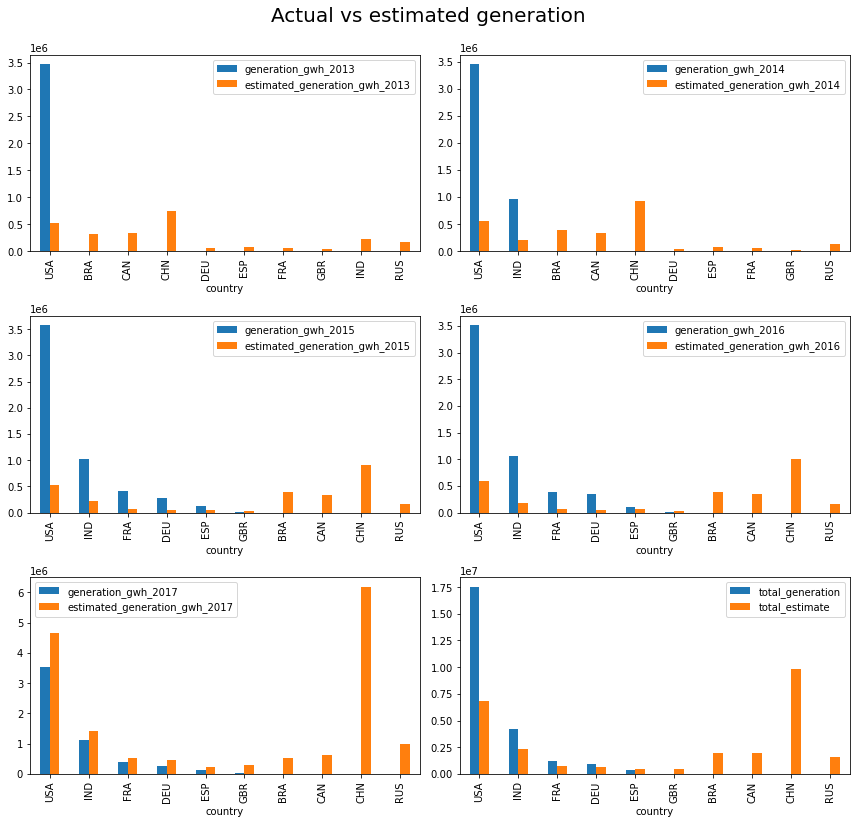

In [22]:
# Creating yearly and total generation plots for actual and estimated generation
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(12,12))
fig.suptitle('Actual vs estimated generation',size=20)
df_top10.groupby('country').agg({'generation_gwh_2013':'sum','estimated_generation_gwh_2013':'sum'}).sort_values(by='generation_gwh_2013',ascending=False).plot(kind='bar',ax=axes[0,0])
df_top10.groupby('country').agg({'generation_gwh_2014':'sum','estimated_generation_gwh_2014':'sum'}).sort_values(by='generation_gwh_2014',ascending=False).plot(kind='bar',ax=axes[0,1])
df_top10.groupby('country').agg({'generation_gwh_2015':'sum','estimated_generation_gwh_2015':'sum'}).sort_values(by='generation_gwh_2015',ascending=False).plot(kind='bar',ax=axes[1,0])
df_top10.groupby('country').agg({'generation_gwh_2016':'sum','estimated_generation_gwh_2016':'sum'}).sort_values(by='generation_gwh_2016',ascending=False).plot(kind='bar',ax=axes[1,1])
df_top10.groupby('country').agg({'generation_gwh_2017':'sum','estimated_generation_gwh_2017':'sum'}).sort_values(by='generation_gwh_2017',ascending=False).plot(kind='bar',ax=axes[2,0])
df_top10.groupby('country').agg({'total_generation':'sum','total_estimate':'sum'}).sort_values(by='total_generation',ascending=False).plot(kind='bar',ax=axes[2,1])
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

__Note :__ As there are lot of missing values in estimated generation columns observed that it's sum is less than the actual generation for 2013-2016 years. So it is not advisable to compare those years as it is making data unrealistic.

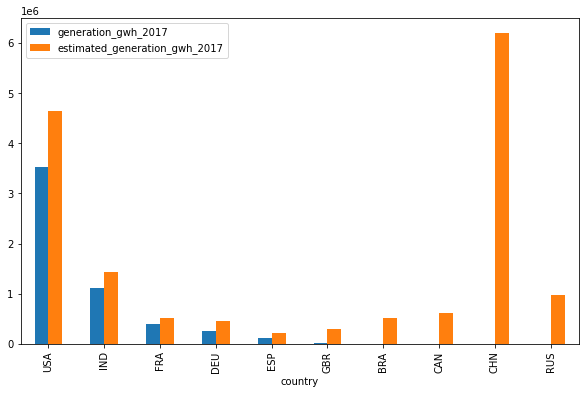

In [23]:
# Plotting 2017 data of actual vs estimated
df_top10.groupby('country').agg({'generation_gwh_2017':'sum','estimated_generation_gwh_2017':'sum'}).sort_values(by='generation_gwh_2017',ascending=False).plot(kind='bar',figsize=(10,6))
plt.show()

In [24]:
# Creating separate lists(long,lat) for top5 primary fuel generations
longitude_solar = []
latitude_solar = []
longitude_hydro = []
latitude_hydro = []
longitude_wind = []
latitude_wind = []
longitude_gas = []
latitude_gas = []
longitude_coal = []
latitude_coal = []
#[longitude_solar.append(df['longitude'][i]) for i in range(len(df)) if df['primary_fuel'][i]=='Solar']

for i in range(len(df)):
    if df['primary_fuel'][i] == 'Solar':
        longitude_solar.append(df['longitude'][i])
        latitude_solar.append(df['latitude'][i])
    elif df['primary_fuel'][i] == 'Hydro':
        longitude_hydro.append(df['longitude'][i])
        latitude_hydro.append(df['latitude'][i])
    elif df['primary_fuel'][i] == 'Wind':
        longitude_wind.append(df['longitude'][i])
        latitude_wind.append(df['latitude'][i])
    elif df['primary_fuel'][i] == 'Gas':
        longitude_gas.append(df['longitude'][i])
        latitude_gas.append(df['latitude'][i])
    elif df['primary_fuel'][i] == 'Coal':
        longitude_coal.append(df['longitude'][i])
        latitude_coal.append(df['latitude'][i])
#print(len(longitude_coal),len(latitude_coal))

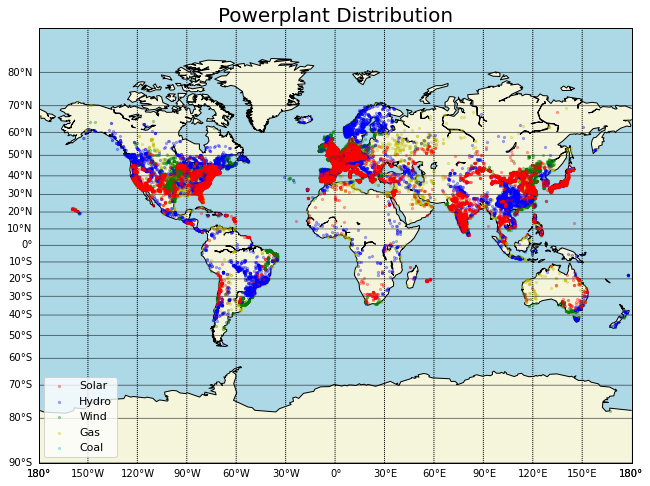

In [25]:
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(30,8))
# drawing 'mill' projection
m = Basemap(projection='mill', llcrnrlat = -90, urcrnrlat = 90, llcrnrlon = -180, urcrnrlon = 180, resolution = 'c')

m.drawcoastlines()
m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])
# filling continents & sea with suitable colors
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='beige')
# plotting scatter plots for different types of generations
m.scatter(longitude_solar,latitude_solar,latlon=True,s=5,c='r',alpha=0.3,label='Solar',zorder=5)
m.scatter(longitude_hydro,latitude_hydro,latlon=True,s=5,c='b',alpha=0.3,label='Hydro',zorder=4)
m.scatter(longitude_wind,latitude_wind,latlon=True,s=5,c='g',alpha=0.3,label='Wind',zorder=3)
m.scatter(longitude_gas,latitude_gas,latlon=True,s=5,c='y',alpha=0.3,label='Gas',zorder=2)
m.scatter(longitude_coal,latitude_coal,latlon=True,s=5,c='c',alpha=0.3,label='Coal',zorder=1)
plt.title('Powerplant Distribution', fontsize=20)
plt.legend(prop={'size': 11})
plt.show()

## Insights Gained:
- According to data, nuclear plant 'Palo Verde' has generated highest power during 5 years(2013-2017)
- USA has large number of powerplants and highest power generation over the years
- After USA, India and France are the highest contributors for power generation
- Out of all primary fuels 'Solar' is most used and 'wave and tidal' is least used for power generation